# Hypothesis Testing

 **Null Hypothesis (H0):** A statement of no change and is 0 assumed true until evidence indicates otherwise

**Alternate Hypothesis (Ha)**: A statement that the researcher is
trying to find evidence to support


**Type I Error:** Reject the null hypothesis when the null hypothesis is
true

**Type II Error:** Do not reject the null hypothesis when the alternative hypothesis is true

**Test Statistics (t):** A single number that summarizes the sample data used to conduct the test hypothesis

**Standard Error:** How far sample statistics (e.g., mean) deviates from the actual population mean

**p-value:** Probability of observing a test statistics

**Significance level (α):** Probability of making Type I error

**Test Statistics**
#### Binomial Distribution
    n = number of iterations
    p = probablity of success
    (1-p) = probablity of failure


Expirement of 100 coin flips and getting 57 right

---


**Null** I'm not special, my true rate of flip prediction is 0.5.
**Alternative:** My true rate of flip prediction is greater than 0.5



In [1]:
from scipy.stats import binom
prob = 1 - binom.cdf(56, 100, 0.5)
prob
# Hence the prob of getting 57 or more correct is 9.6% which is more than 0.5 so we fail to reject null hypothesis

0.09667395224782138

# Hypothesis testing for insurance dataset


In [5]:

import skillsnetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [6]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv'
await skillsnetwork.download(URL, 'insurance.csv')
data = pd.read_csv('insurance.csv')
data.head()

Saved as 'insurance.csv'


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Response variable: Charges
### Predictor variable: age, sex, bmi, children, smoker and region

# Steps of Hypothesis testing

#### First, we will prove or disprove with statistical evidence that the BMI of females is different from males

**Step 1:** Choose a sample statistic
Let u1: population mean for BMI of males <br>
    u2: population mean for BMI of females

**Step 2:** Define null and alternate hypothesis

H0: u1-u2 = 0 (No difference in BMI of male and female) <br>
H1: u1-u2 != 0




#### **Step 3: ** Set the decision criteria

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Hypothesis_Testing_3.png)

## Type of tests
A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know standard deviation of the the population and when you have a limited sample (n < 30). If you know the standard deviation of the populations , you may use a z-test.

A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations, with large (n ≥ 30) samples, whether you know the population standard deviation or not. It is also used for testing the proportion of some characteristic versus a standard proportion, or comparing the proportions of two populations.

An f-test is used to compare variances between 2 populations. The samples can be any size. It is the basis of ANOVA.

chi-squared test is used to determine whether there is a statistically significant difference between the expected and the observed frequencies in one or more categories of a contingency table. A contingency table is a tabular representation of categorical data. It shows the frequency distribution of the variables.

## Step 4: Evaluate and interpret the result

In [12]:
female = data.loc[data.sex=='female']
male = data.loc[data.sex=='male']

In [13]:
f_bmi = female.bmi
m_bmi = male.bmi

<Axes: xlabel='bmi', ylabel='Count'>

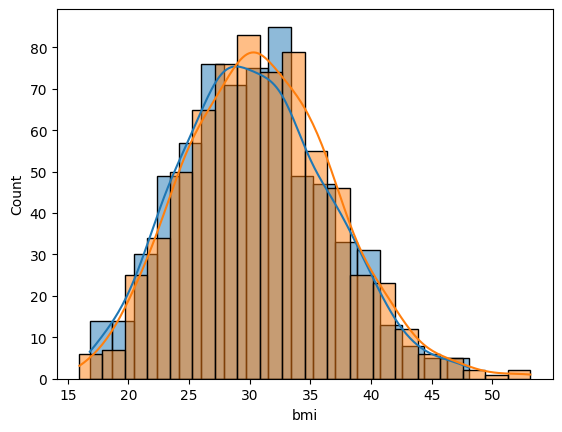

In [18]:
# Plotting distribution of 'bmi' values for females and males
sns.histplot(f_bmi, kde=True)
sns.histplot(m_bmi, kde=True)

We can see the two distribution are very similar

In [19]:
female.bmi.mean()

30.37774924471299

In [20]:
male.bmi.mean()

30.943128698224854

Calculating t-value and p-value

In [21]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print(t_value1, p_value1)

1.696752635752224 0.08997637178984932


In [22]:
if p_value1 < alpha:
    print('Reject null hypothesis that there is no difference between bmi of femals and males')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


# Prove that medical claims made by the people who smoke are greater than those who don't

In [23]:
smoker = data.loc[data.smoker=='yes']
smoker_char = smoker.charges
smoker_mean = smoker_char.mean()
smoker_mean

32050.23183153284

In [24]:
nonsmoker = data.loc[data.smoker=='no']
nonsmoker_char = nonsmoker.charges
nonsmoker_mean = nonsmoker_char.mean()
nonsmoker_mean

8434.268297856204

Defining null and alternate hypothesis <br>
H0: u1 <= u2 (Average charges of smoker is less than or equal to non smoker) <br>
H1: u1 > u2 (Average charges of smoker is greater)

[Text(0.5, 1.0, 'Smoker vs charges')]

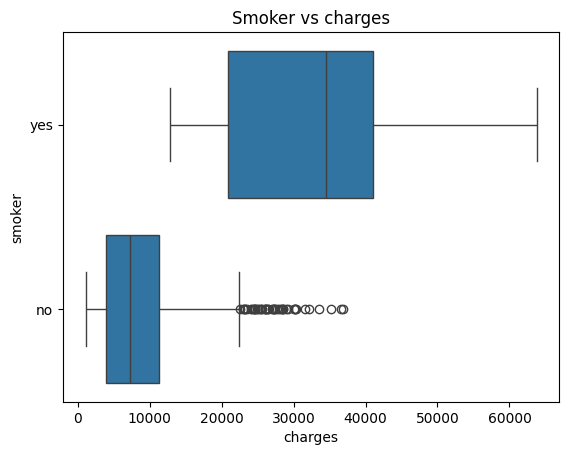

In [25]:
sns.boxplot(x=data.charges, y=data.smoker, data=data).set(title='Smoker vs charges')

In [30]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail = p_value2/2
print(t_val2, p_value_onetail, p_value2)

46.66492117272371 4.135717921089551e-283 8.271435842179102e-283


In [31]:
if p_value2 < alpha:
    print('Reject null hypothesis that the charges for smoker are less than or equal to nonsmoker')
else:
    print('Fail to reject null hypothesis')

Reject null hypothesis that the charges for smoker are less than or equal to nonsmoker


# Determine if the proportion of smokers is significantly different accross the different regions <br>

H0: Smokers proportions are not significantly different accross different regions <br>
H1: Smokers proportions are different accross different regions

In [33]:
# Here we are comparing two different cateogrical variables. For this type of analysis we will perform chi-square test
contingency = pd.crosstab(data.smoker, data.region)
contingency

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


<Axes: xlabel='smoker'>

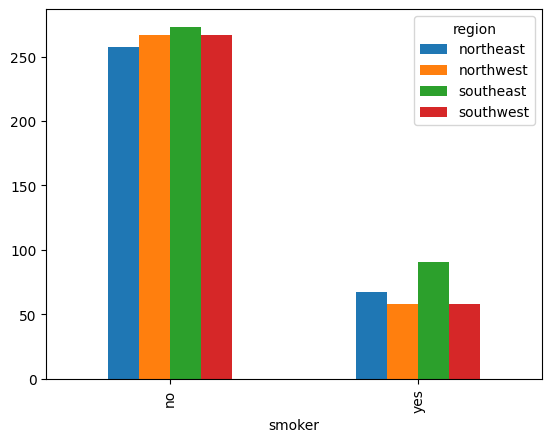

In [35]:
contingency.plot(kind='bar')

In [40]:
from scipy.stats import chi2_contingency
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction=False)
print(chi2, p_val, dof, exp_freq)

7.34347776140707 0.06171954839170547 3 [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


In [41]:
if p_val < alpha:
    print('Reject null hypothesis that smokers proportions are not significantly different accross different regions')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis
